In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv')

In [3]:
data1

,Unnamed: 0,X,y
0,0,50,147
1,1,82,246
2,2,66,207
3,3,35,105
4,4,81,240
...,...,...,...
95,95,98,285
96,96,9,18
97,97,56,174
98,98,50,159


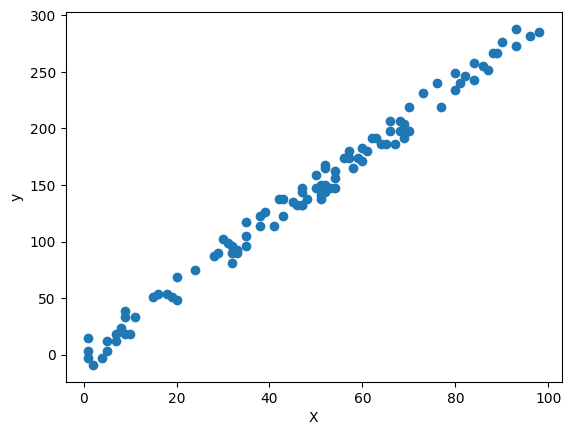

In [7]:
plt.plot(data1['X'], data1['y'], 'o')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [8]:
data2

,Unnamed: 0,X1,X2,y
0,0,50,B,2510
1,1,82,B,6738
2,2,66,B,4355
3,3,35,A,2225
4,4,81,A,7560
...,...,...,...,...
95,95,98,B,9615
96,96,9,A,1066
97,97,56,A,4139
98,98,50,B,2502


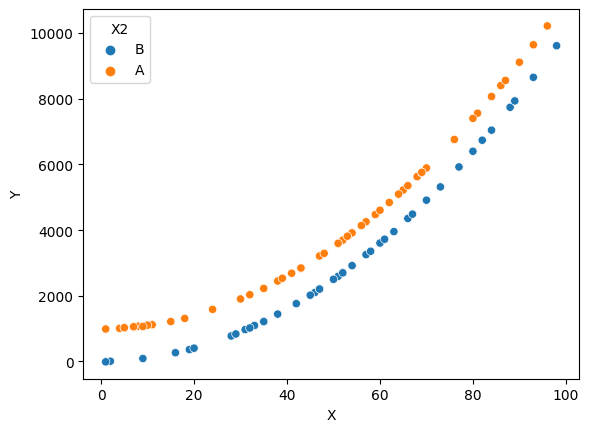

In [11]:
import seaborn as sns

sns.scatterplot(x='X1', y='y', hue='X2', data=data2)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Data1

In [54]:
from sklearn.model_selection import train_test_split

X = data1['X']
y = data1['y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

X_train = np.array(X_train).reshape(-1,1)
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
X_test = np.array(X_test).reshape(-1,1)
lr.predict(X_test)

array([269.24819594,  91.767472  ,  58.6778455 ,  19.57192328,
       251.19930876,  13.55562755,  25.588219  , 239.1667173 ,
       121.84895063, 148.9222814 , 124.85709849, 154.93857713,
        43.63710618, 154.93857713,  19.57192328, 242.17486517,
        70.71043695, 160.95487286,  94.77561986, 151.93042927,
        46.64525405, 263.23190021,  13.55562755,  97.78376772,
       200.06079508])

In [57]:
lr.score(X_test, y_test)

0.9884587677900754

In [58]:
lr.coef_

array([3.00814786])

In [59]:
lr.intercept_

-1.4851117687443605

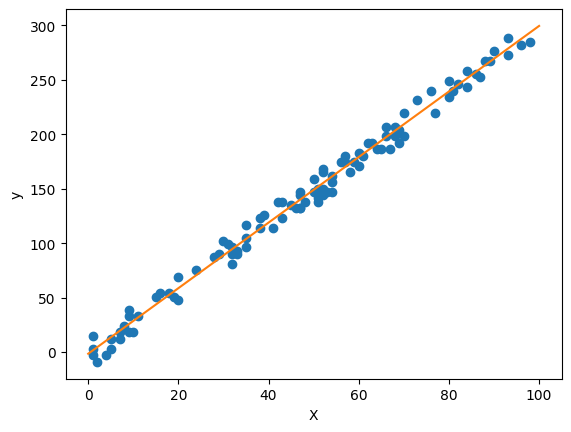

In [60]:
plt.plot(data1['X'], data1['y'], 'o')
plt.xlabel('X')
plt.ylabel('y')
a = np.linspace(0, 100, 1000)
b = lr.coef_[0]*a + lr.intercept_
plt.plot(a, b, '-')
plt.show()

From this, we can see the data in data1 is easily linearly separable, as we are getting a high accuracy (98%) from linear regression

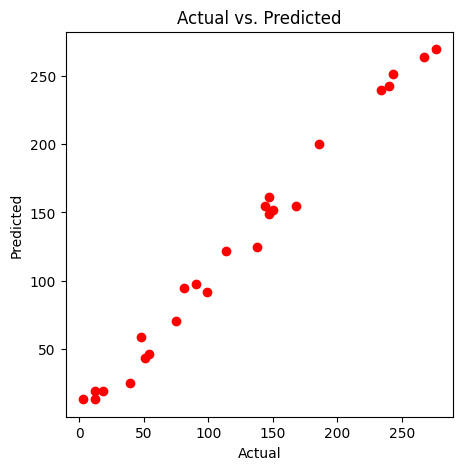

In [74]:
yhat = lr.predict(X_test)
resid = np.array(y_test) - yhat

plt.figure(figsize=(5,5))
plt.plot(np.array(y_test), yhat, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

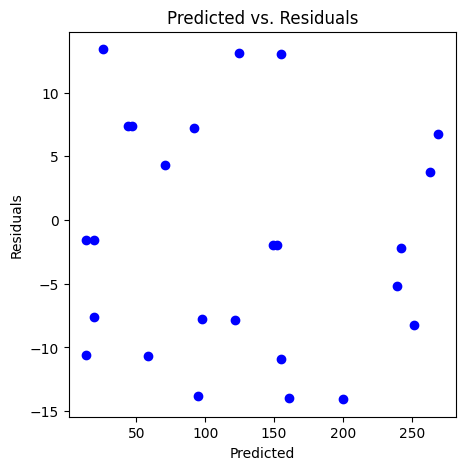

In [75]:
plt.figure(figsize=(5,5))
plt.plot(yhat, resid, 'bo')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residuals')
plt.show()

### From this, we can see that the predictions are all in the range of +- 15, which is a good range of error, given that the range of y is from 0 to around 300

### Data2

In [77]:
#Replace categoricals with 0 and 1 in data2.
data2["X2"] = data2["X2"].replace("A", 0)
data2["X2"] = data2["X2"].replace("B", 1)

In [78]:
from sklearn.model_selection import train_test_split

X2 = data2.drop(columns = 'y')
y2 = data2['y']  

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=17)

In [79]:
lr.fit(X2_train, y2_train)

LinearRegression()

In [80]:
lr.score(X2_test, y2_test)

0.9122525306359583

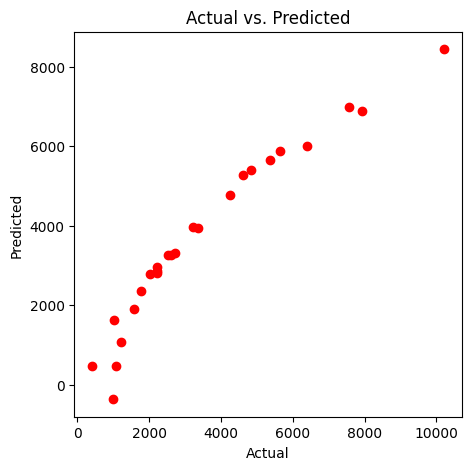

In [82]:
yhat2 = lr.predict(X2_test)
resid2 = np.array(y2_test) - yhat2

plt.figure(figsize=(5,5))
plt.plot(np.array(y2_test), yhat2, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

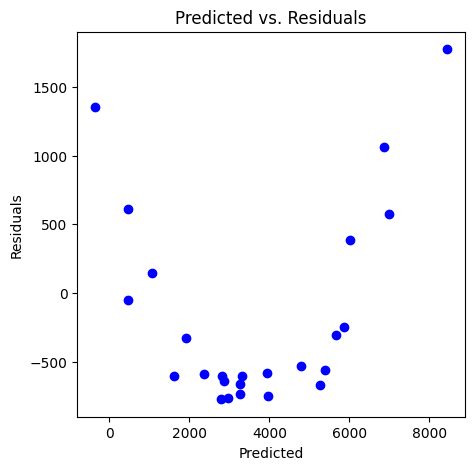

In [83]:
plt.figure(figsize=(5,5))
plt.plot(yhat2, resid2, 'bo')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residuals')
plt.show()

### For this, we can see that again, the range of errors is not too bad, but worse than data1. We are getting decent predictions in the 2000-6000 range (just around 500 off on average), but when the predictions are in the very early, and very late range, the residual error is more

### This could be an indicator that the data is not perfectly linearly separable